# Fourier Series

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

## Fourier Coefficients

$$
f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} a_n \cos \left( \frac{n \pi x}{L} \right) + \sum_{n=1}^{\infty} b_n \sin \left( \frac{n \pi x}{L} \right)
$$

$$
a_0 = \frac{1}{L} \int_{-L}^L f(x) dx
$$

$$
a_n = \frac{1}{L} \int_{-L}^L f(x) \cos \left( \frac{n \pi x}{L} \right) dx
$$

$$
b_n = \frac{1}{L} \int_{-L}^L f(x) \sin \left( \frac{n \pi x}{L} \right) dx
$$

In [193]:
def fourier(f,L,N):
    a = np.zeros(N)
    b = np.zeros(N)
    I,_ = spi.quad(f,-L,L)
    a0 = 1/L*I
    for n in range(1,N+1):
        integrand = lambda x: f(x)*np.cos(n*np.pi*x/L)
        I,_ = spi.quad(integrand,-L,L)
        a[n-1] = 1/L*I
        integrand = lambda x: f(x)*np.sin(n*np.pi*x/L)
        I,_ = spi.quad(integrand,-L,L)
        b[n-1] = 1/L*I
    return a0,a,b

In [194]:
f = lambda x: 1 + 3*np.sin(np.pi*x) + np.cos(np.pi*x) + 3*np.sin(3*np.pi*x)
L = 1
N = 4
a0,a,b = fourier(f,L,N)

In [195]:
a0

2.0000000000000004

In [196]:
a

array([ 1.00000000e+00, -8.32667268e-17,  0.00000000e+00, -5.55111512e-17])

In [197]:
b

array([ 3.00000000e+00,  5.55111512e-17,  3.00000000e+00, -3.88578059e-16])

In [198]:
def fouriersum(a0,a,b,x,L):
    cosine_sum = sum([a[n-1]*np.cos(n*np.pi*x/L) for n in range(1,len(a)+1)])
    sine_sum = sum([b[n-1]*np.sin(n*np.pi*x/L) for n in range(1,len(b)+1)])
    return a0/2 + cosine_sum + sine_sum

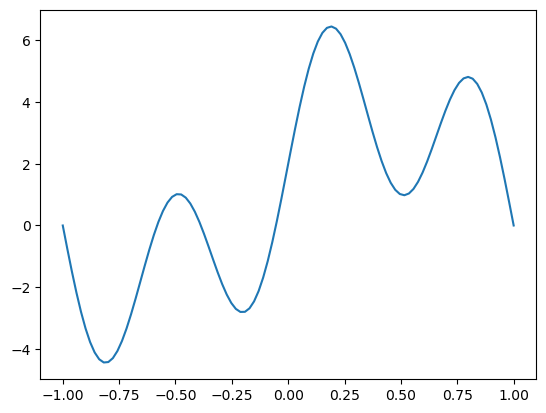

In [199]:
x = np.linspace(-L,L,100)
y = fouriersum(a0,a,b,x,L)
plt.plot(x,y)
plt.show()

In [200]:
import scipy.signal as sps

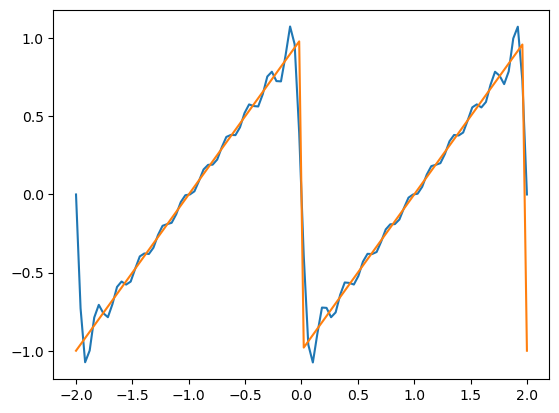

In [202]:
f = lambda x: sps.sawtooth(np.pi*x)
L = 2
a0,a,b = fourier(f,L,20)
x = np.linspace(-L,L,100)
y = fouriersum(a0,a,b,x,L)
plt.plot(x,y)
plt.plot(x,f(x))
plt.show()